# Tutorial scikit-image

O processo de dividir imagens em várias regiões conhecidas, analisadas por  uma máscara inteligente de pixels é conhecido como segmentação de imagem. Envolve mesclar, bloquear e separar uma imagem de seu nível de integração. Dividir uma imagem em uma coleção de objetos de imagem com propriedades comparáveis é o primeiro estágio no processamento de imagem. Scikit-Image é uma das ferramentas mais popular para processamento de imagens em Python.



### RGB para tons de cinza




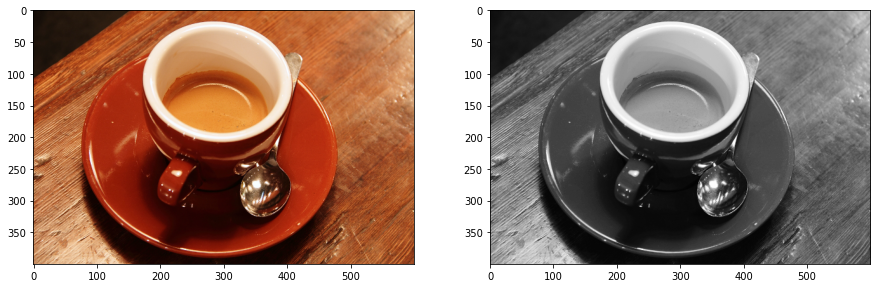

In [1]:
# Importing Necessary Libraries;
from skimage import data;
from skimage.color import rgb2gray;
import matplotlib.pyplot as plt;
# Setting the plot size to 15,15;
plt.figure(figsize=(15, 15));
# Sample Image of scikit-image package;
coffee = data.coffee()
plt.subplot(1, 2, 1)
# Displaying the sample image
plt.imshow(coffee)
# Converting RGB image to Monochrome
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)
# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_coffee, cmap="gray");

### RGB to HSV

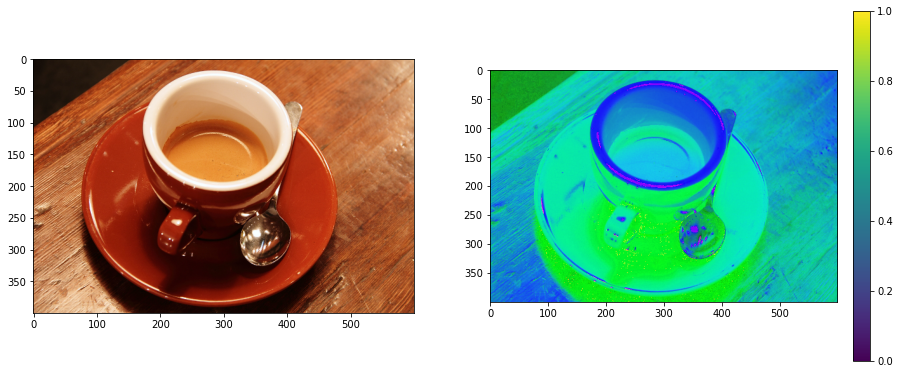

In [2]:
# Importing Necessary Libraries
from skimage.color import rgb2hsv

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
# Sample Image of scikit-image package
coffee = data.coffee()
plt.subplot(1, 2, 1)
# Displaying the sample image
plt.imshow(coffee)
# Converting RGB Image to HSV Image
hsv_coffee = rgb2hsv(coffee)
plt.subplot(1, 2, 2)
# Displaying the sample image - HSV Format
hsv_coffee_colorbar = plt.imshow(hsv_coffee)
# Adjusting colorbar to fit the size of the image
plt.colorbar(hsv_coffee_colorbar, fraction=0.046, pad=0.04);

## Segmentação Supervisionada

### Segmentação por Limiarização – Parametrização manual


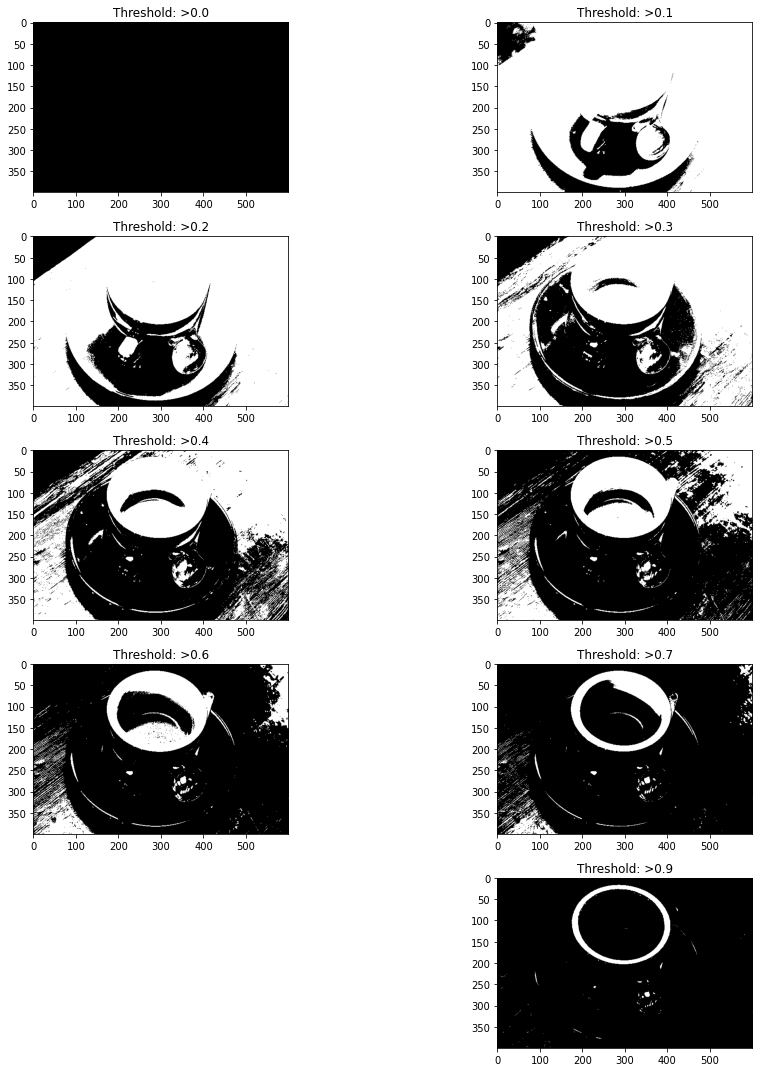

In [3]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import filters

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
for i in range(10):
  # Iterating different thresholds
  binarized_gray = (gray_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
  plt.tight_layout();

### Segmentação com limiarização utilizando skimage.filters

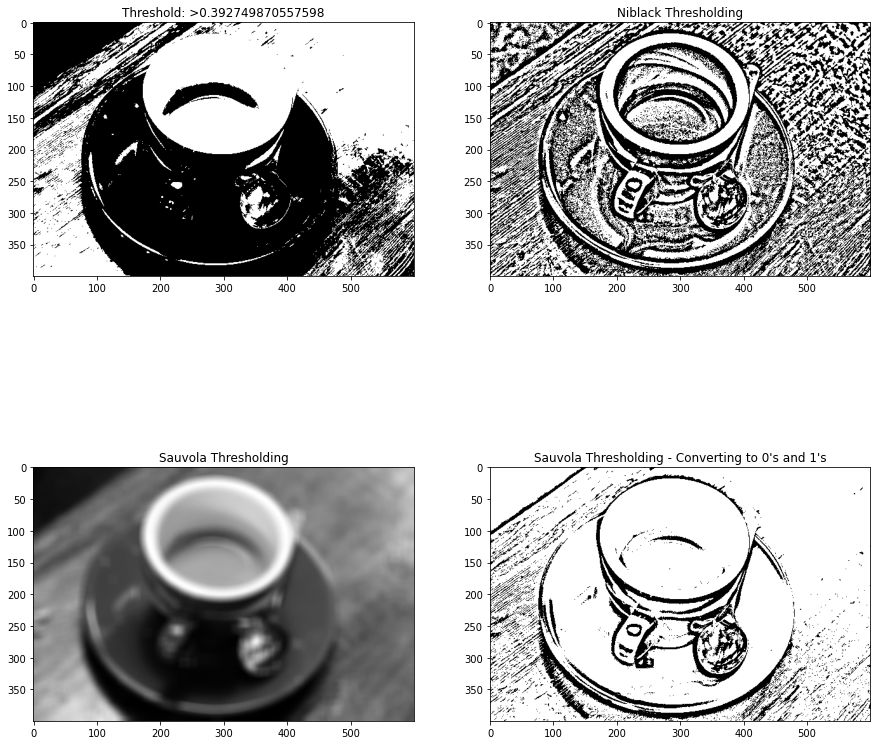

In [4]:

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))
# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)
# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(gray_coffee)
# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")
# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(gray_coffee)
# Computing binarized values using the obtained
# threshold
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray")
# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
threshold = filters.threshold_sauvola(gray_coffee)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")
# Displaying the local threshold values
plt.imshow(threshold, cmap = "gray")
# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
binarized_coffee = (gray_coffee > threshold)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")
# Displaying the binarized image
plt.imshow(binarized_coffee, cmap = "gray");

### Segmentação por Contorno Ativo

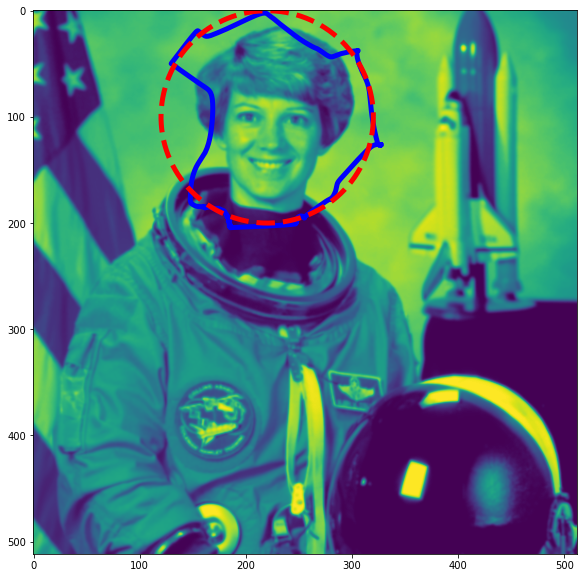

In [5]:
# Importing necessary libraries
import numpy as np
from skimage.filters import gaussian
from skimage.segmentation import active_contour
# Sample Image of scikit-image package
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)
# Applying Gaussian Filter to remove noise
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)
# Localising the circle's center at 220, 110
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 500))
# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T
# Computing the Active Contour for the given image
astronaut_snake = active_contour(gray_astronaut_noiseless,
snake)
fig = plt.figure(figsize=(10, 10))
# Adding subplots to display the markers
ax = fig.add_subplot(111)
# Plotting sample image
ax.imshow(gray_astronaut_noiseless)
# Plotting the face boundary marker
ax.plot(astronaut_snake[:, 0],
astronaut_snake[:, 1],
'-b', lw=5)
# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5);

### Segmentação de Chan-Vese 

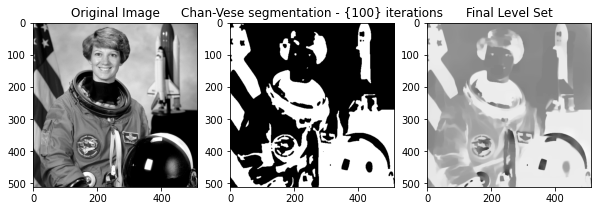

In [6]:
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
# Sample Image of scikit-image package
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)
# Computing the Chan VESE segmentation technique
chanvese_gray_astronaut = chan_vese(gray_astronaut,
max_iter=100,
extended_output=True)
ax = axes.flatten()
# Plotting the original image
ax[0].imshow(gray_astronaut, cmap="gray")
ax[0].set_title("Original Image")
# Plotting the segmented - 100 iterations image
ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
title = "Chan-Vese segmentation - {100} iterations"
format(len(chanvese_gray_astronaut[2]))
ax[1].set_title(title)
# Plotting the final level set
ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
ax[2].set_title("Final Level Set")
plt.show();

### Segmentação Não Supervisionada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # Remove the CWD from sys.path while we load stuff.


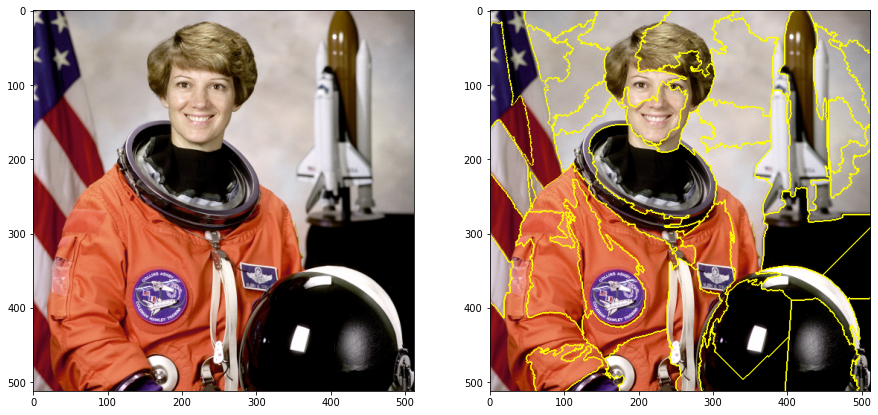

In [7]:
# Importing required boundaries
from skimage.segmentation import slic, mark_boundaries
from skimage.data import astronaut
# Setting the plot figure as 15, 15
plt.figure(figsize=(15, 15))
# Sample Image of scikit-image package
astronaut = astronaut()
# Applying SLIC segmentation
# for the edges to be drawn over
astronaut_segments = slic(astronaut, n_segments=100, compactness=1)
plt.subplot(1, 2, 1)
# Plotting the original image
plt.imshow(astronaut)
# Detecting boundaries for labels
plt.subplot(1, 2, 2)
# Plotting the ouput of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(astronaut, astronaut_segments));

### Segmentação de Felzenszwalb

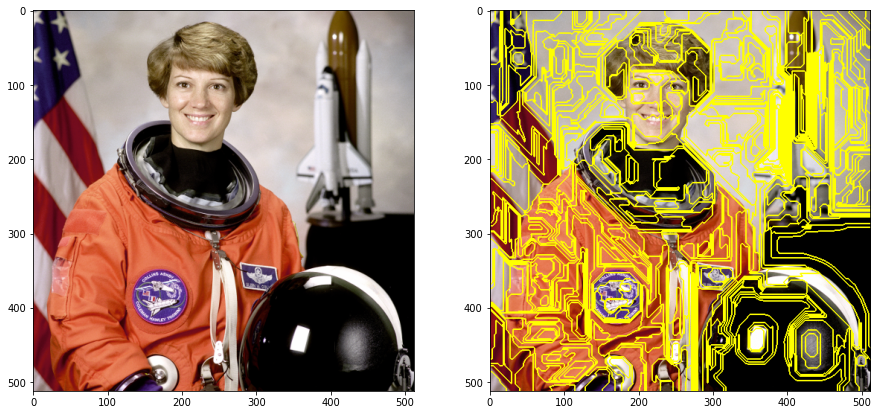

In [8]:
# Importing the required libraries
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb
from skimage.data import astronaut
# Setting the figure size as 15, 15
plt.figure(figsize=(15,15))
# Sample Image of scikit-image package
astronaut = astronaut()
# computing the Felzenszwalb's
# Segmentation with sigma = 5 and minimum
# size = 100
astronaut_segments = felzenszwalb(astronaut, scale=2, sigma=5, min_size=100)
# Plotting the original image
plt.subplot(1,2,1)
plt.imshow(astronaut)
# Marking the boundaries of
# Felzenszwalb's segmentations
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(astronaut, astronaut_segments));